In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("air_quality_health_impact_data.csv")   
df


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [3]:
print("Shape of dataset:", df.shape)


Shape of dataset: (5811, 15)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [5]:
df.describe()


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [6]:
df.isnull().sum()


RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [8]:
df.isnull().sum()


RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [9]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.shape


(5811, 15)

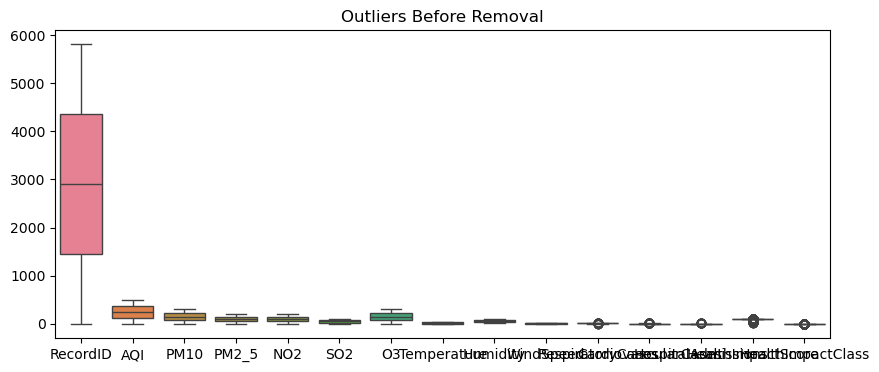

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.title("Outliers Before Removal")
plt.show()


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | 
          (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df.shape


(4167, 15)

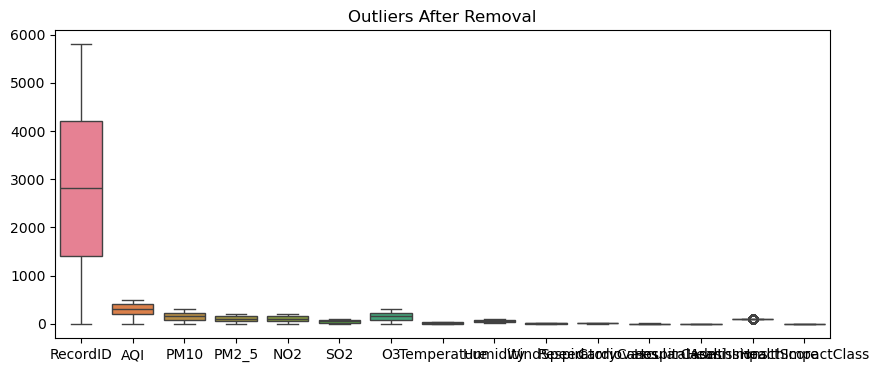

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.title("Outliers After Removal")
plt.show()


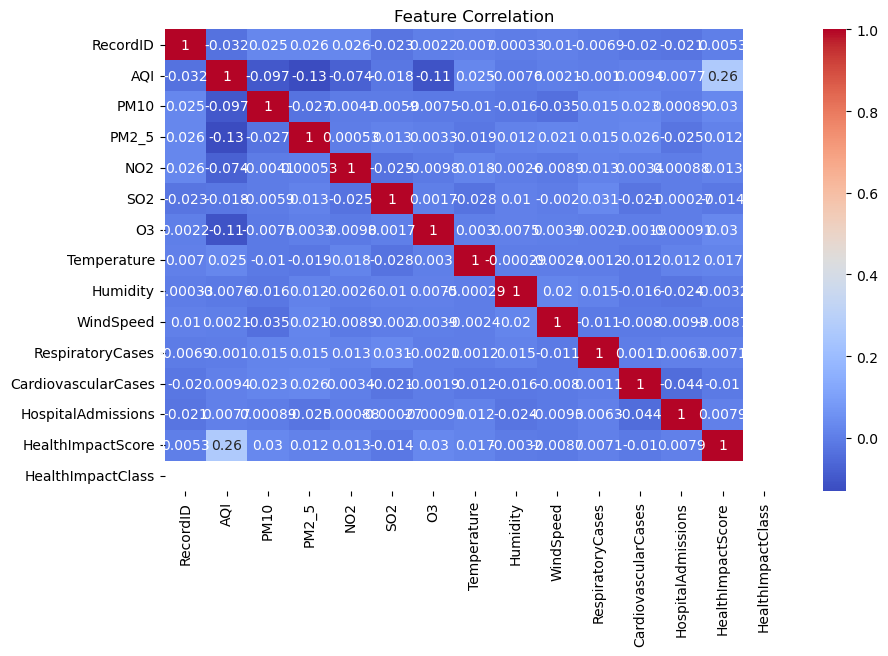

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [20]:
X = df.drop("AQI", axis=1)
y = df["AQI"]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2 Score:", r2_score(y_test, lr_pred))


Linear Regression
MAE: 95.34141331436594
RMSE: 112.26755048477122
R2 Score: 0.09834102793981514


In [30]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("R2 Score:", r2_score(y_test, dt_pred))


Decision Tree
MAE: 124.90452643519477
RMSE: 155.95339190534753
R2 Score: -0.7398966989786824


In [32]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))


Random Forest
MAE: 92.71620915435363
RMSE: 111.63503736384195
R2 Score: 0.108472264744361


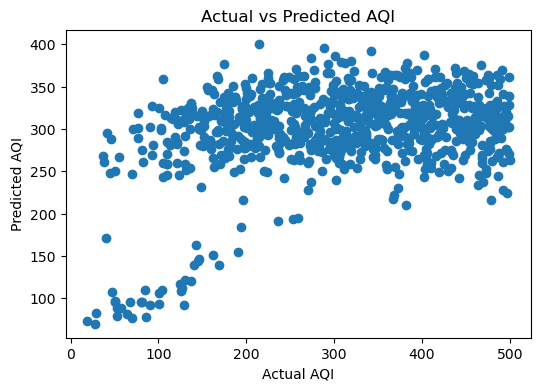

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()


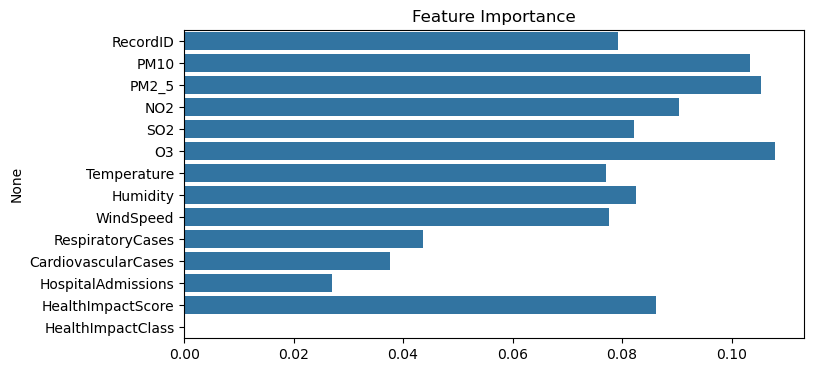

In [36]:
importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()
